<a href="https://colab.research.google.com/github/nsk20/CMPE257-Fall23-ShyamKumar-Nalluri/blob/homework-1/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import partial

In [ ]:
def perceptron(points, dim, max_it=100, use_adaline=False,
               eta = 1, randomize=False, print_out = True):
    w = np.zeros(dim+1)
    xs, ys = points[:,:dim+1], points[:,dim+1]
    num_points = points.shape[0]
    for it in range(max_it):
        correctly_predicted_ids=  set()
        idxs = np.arange(num_points)
        if randomize:
            idxs = np.random.choice(np.arange(num_points), num_points, replace=False)
        for idx in idxs:
            x, y = xs[idx], ys[idx]
            st = np.dot(w.T, x)
            prod = st*y #np.dot(w.T, x)*y
            if prod < -100: #avoid out of bound error
                st = -100
            threshold = 1 if use_adaline else 0
            st = st if use_adaline else 0
            if prod <= threshold:
                w = w + eta *(y-st)*x
                break #PLA picks one example at each iteration
            else:
                correctly_predicted_ids.add(idx)
        if len(correctly_predicted_ids) == num_points:
            break

    c = 0
    for x, y in zip(xs, ys):
        prod = np.dot(w.T, x)*y
        if prod > 0:
            c +=1
    w = w/w[-1]
    if print_out:
        print('final correctness: ', c, '. Total iteration: ', it)
        print('final normalized w:', w)
    return w, it



def generate_random_numbers01(N, dim, num_grid_points):
    random_ints = np.random.randint(num_grid_points, size=(N, dim))
    init_lb = 0
    return (random_ints - init_lb)/(num_grid_points - 1 - init_lb)



def generate_random_numbers(N, dim, num_grid_points, lb, ub):
    zero_to_one_points = generate_random_numbers01(N, dim, num_grid_points)
    res = lb + (ub - lb)*zero_to_one_points
    return res


def true_f(x, coeffs):
    return coeffs.flatten()[0] + np.dot(coeffs.flatten()[1:], x.flatten())


def generate_two_classes(N, dim, true_func, rn_func):
    cls1, cls2 = [], []
    while True:
        rn = rn_func(1, dim).flatten()
        if true_func(rn) > 0 and len(cls1) < N:
            cls1.append(rn)
        elif true_func(rn) < 0 and len(cls2) < N:
            cls2.append(rn)
        if len(cls1) == N and len(cls2) == N:
            break
    return np.asarray(cls1), np.asarray(cls2)


def generate_df(N, dim,true_func, rn_func):
    cls1, cls2 = generate_two_classes(N/2, dim, true_func, rn_func)
    cols = ['x' + str(i) for i in range(1, dim+1)]
    df1 = pd.DataFrame(cls1, columns=cols)
    df1['y'] = 1
    df2 = pd.DataFrame(cls2, columns=cols)
    df2['y'] = -1
    df = pd.concat([df1, df2])
    df['x0'] = 1
    df = df[['x0'] + cols + ['y']]
    return df


def plot_data(x1, df, norm_coeffs, norm_g, lb, ub):
        figsize = plt.figaspect(1)
        f, ax = plt.subplots(1, 1, figsize=figsize)
        cls1_df = df.loc[df['y']==1]
        cls2_df = df.loc[df['y']==-1]
        line = ax.plot(x1, -(norm_coeffs[0]+norm_coeffs[1]*x1), label='True Function')
        if norm_g is not None:
            hypothesis = ax.plot(x1, -(norm_g[0]+norm_g[1]*x1), c = 'r', label='Final Hypothesis')
        pluses = ax.scatter(cls1_df[['x1']].values, cls1_df[['x2']].values, marker='+', c= 'r', label='+1 labels')
        minuses = ax.scatter(cls2_df[['x1']].values, cls2_df[['x2']].values, marker=r'$-$', c= 'b', label='-1 labels')


        ax.set_ylabel(r"$x_2$", fontsize=11)
        ax.set_xlabel(r"$x_1$", fontsize=11)
        ax.set_title('Data set size = %s'%N, fontsize=9)
        ax.axis('tight')
        legend_x = 2.0
        legend_y = 0.5
        ax.legend(['True Function', 'Final Hypothesis',
                   '+1 labels', '-1 labels', ],
                  loc='center right', bbox_to_anchor=(legend_x, legend_y))
        #ax.legend(handles=[pluses, minuses], fontsize=9)
        ax.set_ylim(bottom=lb, top=ub)
        plt.show()

final correctness:  63 . Total iteration:  999
final normalized w: [ 0.1253184  -0.81444545  1.        ]
True coeffs:  [0.07189542 0.78015449 1.        ]


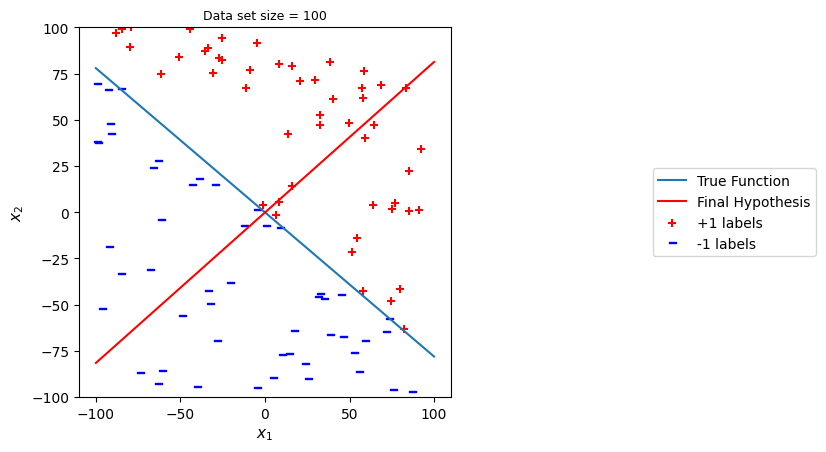

Eta =  100  Accuracy =  59.41
final correctness:  60 . Total iteration:  999
final normalized w: [-1.64812172 -8.81234363  1.        ]
True coeffs:  [0.07189542 0.78015449 1.        ]


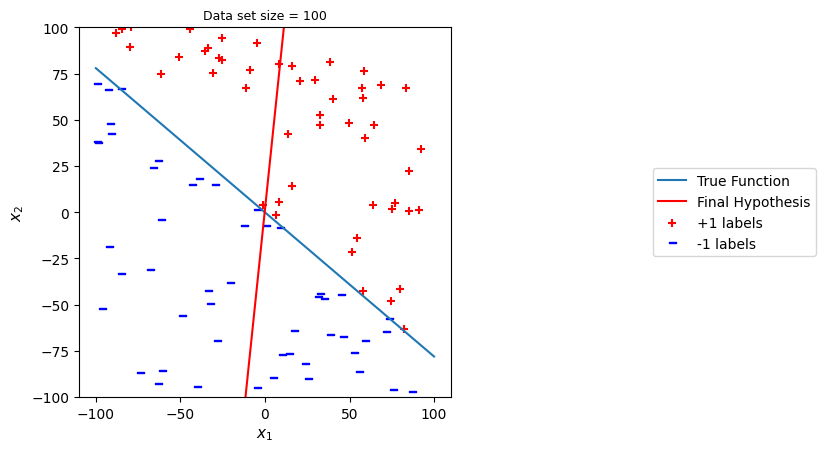

Eta =  1  Accuracy =  33.2
final correctness:  64 . Total iteration:  999
final normalized w: [ 0.13767955 -0.80345161  1.        ]
True coeffs:  [0.07189542 0.78015449 1.        ]


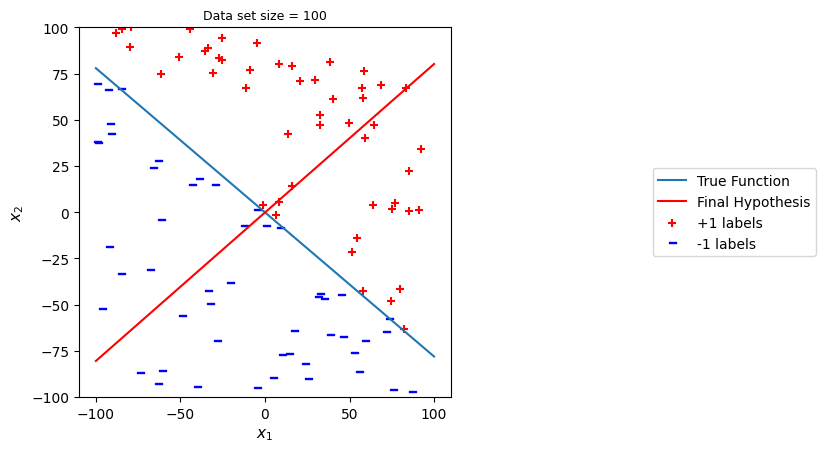

Eta =  0.01  Accuracy =  59.74
final correctness:  98 . Total iteration:  999
final normalized w: [-0.10970001  0.75885556  1.        ]
True coeffs:  [0.07189542 0.78015449 1.        ]


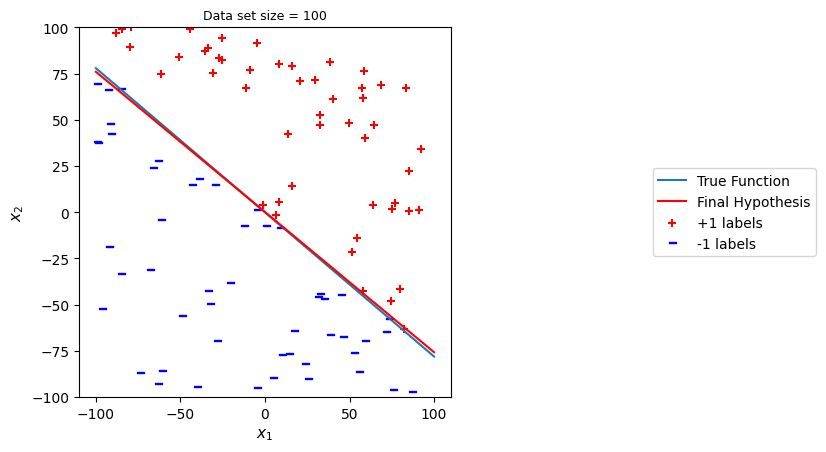

Eta =  0.0001  Accuracy =  99.44


In [ ]:
lb, ub = -100, 100
N, dim = 100, 2
num_grid_points = 2000
coeff_lb, coeff_ub = -10, 10
maxit = 1000
use_adaline, randomize = True, True
show_plot = True
test_N = 10000

rns = generate_random_numbers(N, dim, num_grid_points, lb, ub)
rn_func = partial(generate_random_numbers, num_grid_points = num_grid_points, lb = lb, ub = ub)
coeffs = generate_random_numbers(1, dim+1, num_grid_points, coeff_lb, coeff_ub)
norm_coeffs = coeffs.flatten()/coeffs.flatten()[-1]
true_func = partial(true_f, coeffs = norm_coeffs)

df = generate_df(N, dim, true_func, rn_func)
test_df = generate_df(test_N, dim, true_func, rn_func)

x1 = np.arange(lb, ub, 0.01)

for eta in [100, 1, 0.01, 0.0001]:
    norm_g, num_its = perceptron(df.values, dim, maxit, use_adaline,
                                 eta, randomize, show_plot)

    if show_plot:
        print('True coeffs: ', norm_coeffs)
        plot_data(x1, df, norm_coeffs, norm_g, lb, ub)

    xs = test_df[['x0', 'x1', 'x2']].values
    ys = test_df['y'].values
    accuracy = 0
    for x, y in zip(xs, ys):
        prod = np.dot(norm_g.T, x)*y
        if prod > 0:
            accuracy +=1
    print('Eta = ', eta, ' Accuracy = ', accuracy/100)